<a href="https://colab.research.google.com/github/Deb052024/Text-Analytics/blob/main/Tweet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/twitter_disaster.csv')

In [3]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
df.shape

(7613, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
import nltk


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize, sent_tokenize

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Clean text data by removing special characters, URLs, and punctuation**

In [ ]:

import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
df['cleaned_text']

,cleaned_text
0,Our Deeds are the Reason of this earthquake Ma...
1,Forest fire near La Ronge Sask Canada
2,All residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby Alaska as s...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,aria_ahrary TheTawniest The out of control wil...
7610,M194 0104 UTC5km S of Volcano Hawaii
7611,Police investigating after an ebike collided w...


**Clean keyword and location column  data by removing special characters, URLs, and punctuation**

In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/twitter_disaster.csv')
df.describe()
df.shape
df.info()
nltk.download('punkt')

nltk.download("wordnet")
nltk.download("omw-1.4")


def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['cleaned_text'] = df['text'].apply(clean_text)
#df['cleaned_text']

#Clean keyword column
def clean_keyword(keyword):
    if isinstance(keyword, str):
        keyword = re.sub(r'http\S+', '', keyword)
        keyword = re.sub(r'[^\w\s]', '', keyword)
        return keyword
    else:
        return keyword
df['cleaned_keyword'] = df['keyword'].apply(clean_keyword)

#Clean location column
def clean_location(location):
    if isinstance(location, str):
        location = re.sub(r'http\S+', '', location)
        location = re.sub(r'[^\w\s]', '', location)
        return location
    else:
        return location

df['cleaned_location'] = df['location'].apply(clean_location)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**Generate the cleaned data set with keyword,location and text columns along with id,target**

In [7]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

warnings.filterwarnings('ignore')

# Assuming 'twitter_disaster.csv' is in your current working directory or you've mounted your Google Drive and provided correct path
df = pd.read_csv('/content/twitter_disaster.csv')

# Download required NLTK data
nltk.download('punkt')
nltk.download("wordnet")
nltk.download("omw-1.4")

def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Convert to string to handle potential non-string values
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

def clean_keyword(keyword):
    if isinstance(keyword, str):
        keyword = re.sub(r'http\S+', '', keyword)
        keyword = re.sub(r'[^\w\s]', '', keyword)
        return keyword
    else:
        return keyword

df['cleaned_keyword'] = df['keyword'].apply(clean_keyword)

def clean_location(location):
    if isinstance(location, str):
        location = re.sub(r'http\S+', '', location)
        location = re.sub(r'[^\w\s]', '', location)
        return location
    else:
        return location

df['cleaned_location'] = df['location'].apply(clean_location)

# Create df1 with specified columns
df1 = df[['id', 'target', 'cleaned_keyword', 'cleaned_location', 'cleaned_text']]
df1 = df1.rename(columns={'cleaned_keyword': 'keyword', 'cleaned_location': 'location', 'cleaned_text': 'text'})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Generate a bar plot of the top 6 most frequent words in keywords with different colors**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


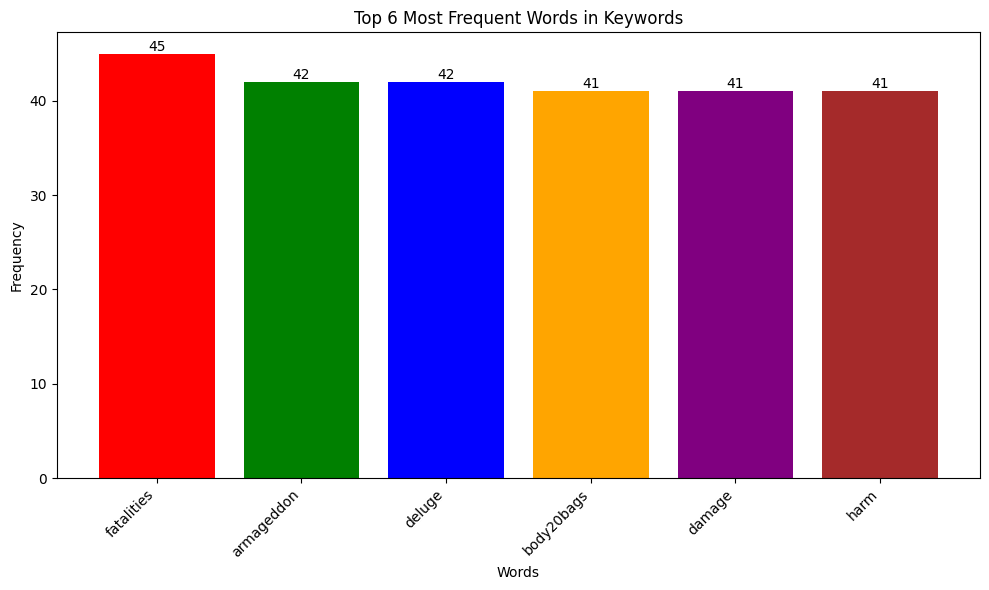

In [9]:


nltk.download('punkt_tab')
from collections import Counter

# Assuming 'df1' is your DataFrame and 'keyword' column exists
keywords = df1['keyword'].dropna().astype(str).str.cat(sep=' ')
words = nltk.word_tokenize(keywords)
word_counts = Counter(words)
top_6_words = word_counts.most_common(6)

words = [word for word, count in top_6_words]
counts = [count for word, count in top_6_words]

plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=['red', 'green', 'blue', 'orange', 'purple', 'brown'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 6 Most Frequent Words in Keywords')
plt.xticks(rotation=45, ha='right')

# Add frequency labels above each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
df1['keyword'].value_counts()

,count
keyword,
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
...,...
forest20fire,19
epicentre,12
threat,11


**Generate a bar plot of the top 6 most frequent words in keywords with different colors for top  6 six locations**

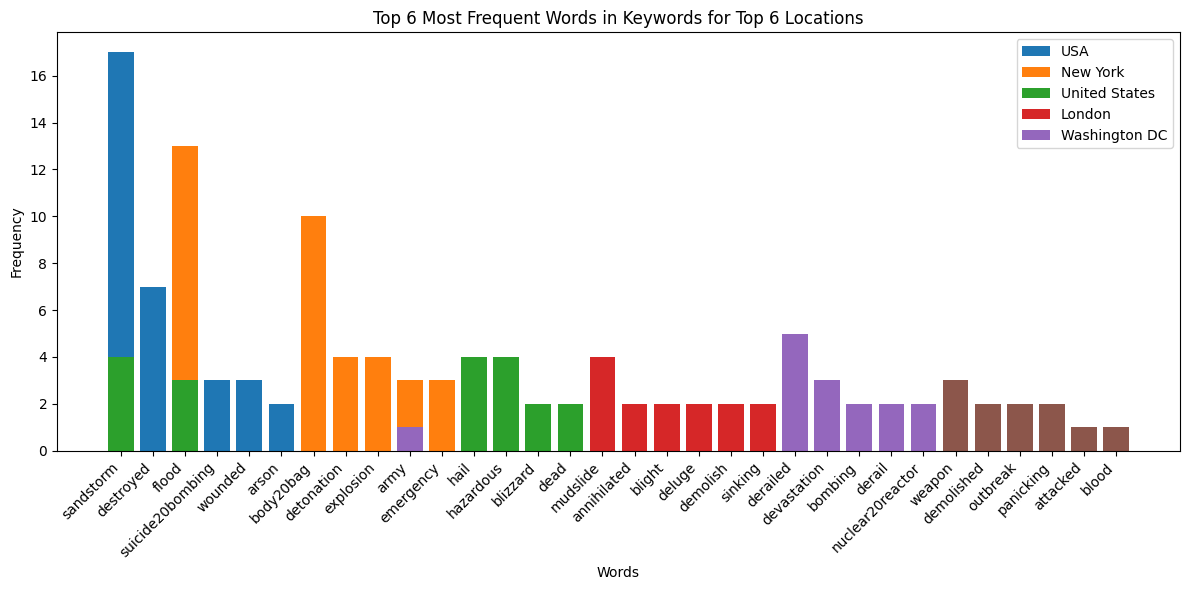

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming df1 is already defined as in your provided code

top_locations = df1['location'].value_counts().nlargest(6).index

plt.figure(figsize=(12, 6))

for i, location in enumerate(top_locations):
    keywords = df1[df1['location'] == location]['keyword'].dropna().astype(str).str.cat(sep=' ')
    words = nltk.word_tokenize(keywords)
    word_counts = Counter(words)
    top_6_words = word_counts.most_common(6)
    words = [word for word, count in top_6_words]
    counts = [count for word, count in top_6_words]

    plt.bar(words, counts, label=location, color=plt.cm.get_cmap('tab10')(i))


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 6 Most Frequent Words in Keywords for Top 6 Locations')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df1['location'].value_counts()

,count
location,
USA,108
New York,71
United States,50
London,46
Washington DC,40
...,...
MontrÌal QuÌbec,1
Montreal,1
ÌÏT 64682318287,1


**Visualize class distributions (disaster vs. non-disaster tweets) using histograms or bar plots**

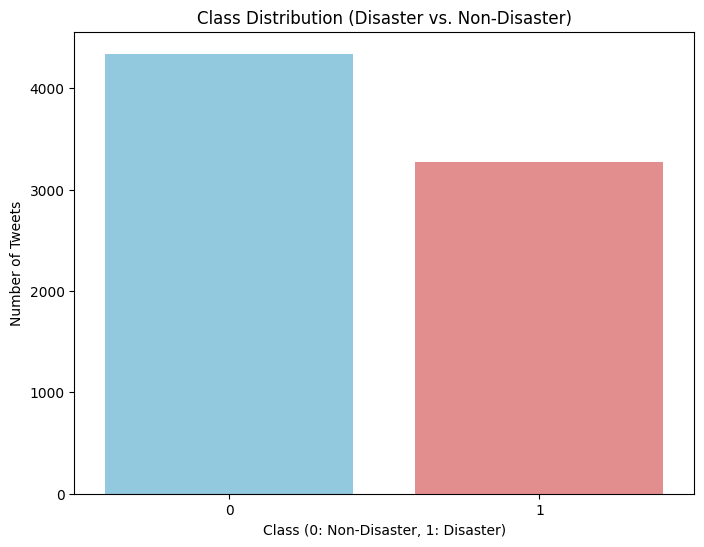

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df1['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['skyblue', 'lightcoral'])
plt.title('Class Distribution (Disaster vs. Non-Disaster)')
plt.xlabel('Class (0: Non-Disaster, 1: Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

**Key Tasks
Part 1: Data Exploration and Preparation**

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')
nltk.download('stopwords')
# Now, your code should work
from nltk import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Analyze frequently occurring keywords and phrases in disaster-related tweets**

In [12]:

from collections import Counter

# Combine all text data for analysis
all_text = ' '.join(df1['text'].astype(str))

# Tokenize the text
tokens = word_tokenize(all_text.lower())

# Remove stop words (optional but recommended)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words and w.isalnum()]

# Frequency distribution of words
word_freq = Counter(tokens)

# Print the most common words
print("Most common words:")
print(word_freq.most_common(20))  # Display the top 20 most frequent words


# Analyze frequent phrases (bigrams or trigrams)
from nltk import ngrams
bigrams = ngrams(tokens, 2)
bigram_freq = Counter(bigrams)

print("\nMost common bigrams:")
print(bigram_freq.most_common(10)) # Display the top 10 most frequent bigrams

trigrams = ngrams(tokens, 3)
trigram_freq = Counter(trigrams)
print("\nMost common trigrams:")
print(trigram_freq.most_common(10)) # Display the top 10 most frequent trigrams

Most common words:
[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229), ('new', 224), ('via', 220), ('people', 196), ('news', 193), ('one', 192), ('dont', 191), ('video', 165), ('us', 164), ('2', 159), ('emergency', 157), ('disaster', 152), ('police', 140), ('would', 131), ('still', 129), ('body', 124)]

Most common bigrams:
[(('suicide', 'bomber'), 59), (('burning', 'buildings'), 58), (('gon', 'na'), 43), (('youtube', 'video'), 43), (('liked', 'youtube'), 42), (('northern', 'california'), 41), (('cross', 'body'), 39), (('oil', 'spill'), 39), (('wan', 'na'), 35), (('suicide', 'bombing'), 34)]

Most common trigrams:
[(('liked', 'youtube', 'video'), 42), (('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', 'bomb'), 28), (('razed', 'northern', 'california'), 27), (('16yr', 'old', 'pkk'), 27), (('old', '

**Extract features like TF-IDF scores, and sentiment analysis**

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Assuming df1 is already created as in the previous code

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for demonstration
tfidf_matrix = vectorizer.fit_transform(df1['text'].astype(str))  # Convert to string
feature_names = vectorizer.get_feature_names_out()

# Ensure unique column names for TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{name}" for name in feature_names])
df1 = df1.loc[:, ~df1.columns.duplicated()]
df1 = pd.concat([df1, tfidf_df], axis=1)


# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Handle potential non-string values
    return analysis.sentiment.polarity

df1['sentiment_polarity'] = df1['text'].apply(get_sentiment)

print(df1.head())

   id  target keyword location  \
0   1       1     NaN      NaN   
1   4       1     NaN      NaN   
2   5       1     NaN      NaN   
3   6       1     NaN      NaN   
4   7       1     NaN      NaN   

                                                text  0104  010401   02   05  \
0  0       Our Deeds are the Reason of this earth...   0.0     0.0  0.0  0.0   
1  0       Our Deeds are the Reason of this earth...   0.0     0.0  0.0  0.0   
2  0       Our Deeds are the Reason of this earth...   0.0     0.0  0.0  0.0   
3  0       Our Deeds are the Reason of this earth...   0.0     0.0  0.0  0.0   
4  0       Our Deeds are the Reason of this earth...   0.0     0.0  0.0  0.0   

    06  ...  ûïhatchet  ûïrichmond  ûïthe  ûïwe  ûïwhen   ûò   ûó  tfidf_text  \
0  0.0  ...        0.0         0.0    0.0   0.0     0.0  0.0  0.0         1.0   
1  0.0  ...        0.0         0.0    0.0   0.0     0.0  0.0  0.0         1.0   
2  0.0  ...        0.0         0.0    0.0   0.0     0.0  0.0  0.0      

**Leverage pre-trained word embeddings (e.g., Word2Vec, GloVe) for semantic
meaning**

In [55]:
!pip install gensim

import gensim.downloader as api

# Load pre-trained word embeddings (e.g., Word2Vec Google News)
try:
    model = api.load("word2vec-google-news-300")
except Exception as e:
    print(f"Error loading word2vec-google-news-300: {e}")
    print("Trying to download a smaller model...")
    try:
        model = api.load("glove-twitter-25")
    except Exception as e:
        print(f"Error loading glove-twitter-25: {e}")
        print("Could not load any word embeddings.")
        model = None


if model:
    # Example usage: Find similar words
    similar_words = model.most_similar("disaster", topn=10)
    print("Words similar to 'disaster':", similar_words)

    # Example usage: Calculate word similarity
    similarity = model.similarity("disaster", "emergency")
    print("Similarity between 'disaster' and 'emergency':", similarity)


    # Integrate with your DataFrame (df1)
    def get_word_embedding(text):
        tokens = word_tokenize(text.lower())  # Tokenize the text
        # Remove words not in vocabulary
        tokens = [word for word in tokens if word in model.key_to_index]
        if tokens:  # Check if there are any valid tokens
          return np.mean(model[tokens], axis=0)
        else:
          return np.zeros(model.vector_size)  # Return a zero vector if no valid tokens are found

    df1['word_embedding'] = df1['text'].apply(get_word_embedding)

    print(df1.head())

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Words similar to 'disaster': [('disasters', 0.7751654982566833), ('calamity', 0.7409838438034058), ('catastrophe', 0.7316239476203918), ('Disaster', 0.7234424352645874), ('diaster', 0.7086317539215088), ('disater', 0.6191920638084412), ('distaster', 0.5888047218322754), ('tragedy', 0.5871202945709229), ('natural_disasters', 0.5869818329811096), ('catastrophes', 0.5848628282546997)]
Similarity between 'disaster' and 'emergency': 0.47155938
   id  target keyword location  \
0   1       1     NaN      NaN   
1   4       1     NaN      NaN   
2   5       1     NaN      NaN   
3   6       1     NaN      NaN   
4   7       1     NaN      NaN   

                                                text  0104  010401   02   05  \
0  0       Our Deeds are the Reason of this earth...   0.0     0.0  0.0  0.0   
1  0       Our Deeds are the Reason of this earth...   0.0     0.0  0.0  0.0   
2  0       Our Deeds are 